In [7]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans


In [9]:
df= pd.read_excel('E:/sameh/StoresData.xlsx')
df

,Store No.,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),State,State (Num),Age (Yrs),GrossProfit,...,Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel,HomeDel (Num),Basket:2013,Basket:2014
0,1,12.5,2.3,60,Mall,2,NSW,1,10,0.712,...,0,33,12,2,38,46,Del:No,0,171,178
1,2,14.5,2.7,69,Mall,2,Vic,2,8,0.091,...,0,33,16,1,38,73,Del:No,0,168,178
2,3,19.0,3.1,79,Country,3,Vic,2,7,1.075,...,0,30,9,2,39,64,Del:No,0,180,188
3,4,18.2,2.6,66,Mall,2,Qld,3,7,1.372,...,0,29,9,2,38,66,Del:Yes,1,173,180
4,5,7.6,2.0,51,Strip,1,Qld,3,15,2.148,...,0,36,4,3,40,29,Del:No,0,166,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,14.1,3.3,88,Strip,1,SA,4,5,0.504,...,1,42,9,3,35,63,Del:No,0,163,172
146,147,8.1,1.7,58,Country,3,NSW,1,19,0.447,...,0,43,12,3,42,35,Del:No,0,178,186
147,148,13.6,2.9,66,Strip,1,WA,5,17,2.620,...,0,39,8,3,45,48,Del:No,0,166,172
148,149,10.0,2.0,55,Mall,2,WA,5,8,1.168,...,0,52,13,3,40,34,Del:No,0,174,182


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store No.      150 non-null    int64  
 1   Sales $m       150 non-null    float64
 2   Wages $m       150 non-null    float64
 3   No. Staff      150 non-null    int64  
 4   Location       150 non-null    object 
 5   Loc'n (Num)    150 non-null    int64  
 6   State          150 non-null    object 
 7   State (Num)    150 non-null    int64  
 8   Age (Yrs)      150 non-null    int64  
 9   GrossProfit    150 non-null    float64
 10  Adv.$'000      150 non-null    int64  
 11  Competitors    150 non-null    int64  
 12  HrsTrading     150 non-null    int64  
 13  Sundays        150 non-null    object 
 14  Sundays (Num)  150 non-null    int64  
 15  Mng-Sex        150 non-null    object 
 16  Mng-Sex (Num)  150 non-null    int64  
 17  Mng-Age        150 non-null    int64  
 18  Mng-Exp   

In [11]:
df.isna().sum()

Store No.        0
Sales $m         0
Wages $m         0
No. Staff        0
Location         0
Loc'n (Num)      0
State            0
State (Num)      0
Age (Yrs)        0
GrossProfit      0
Adv.$'000        0
Competitors      0
HrsTrading       0
Sundays          0
Sundays (Num)    0
Mng-Sex          0
Mng-Sex (Num)    0
Mng-Age          0
Mng-Exp          0
Mng-Train        0
Union%           0
Car Spaces       0
HomeDel          0
HomeDel (Num)    0
Basket:2013      0
Basket:2014      0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,Store No.,Sales $m,Wages $m,No. Staff,Loc'n (Num),State (Num),Age (Yrs),GrossProfit,Adv.$'000,Competitors,...,Sundays (Num),Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),Basket:2013,Basket:2014
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,11.659333,2.376667,61.493333,1.913333,3.033333,8.846667,1.009953,147.273333,2.506667,...,0.620000,0.166667,38.420000,9.253333,2.813333,37.786667,44.186667,0.300000,171.806667,178.846667
std,43.445368,3.570989,0.567866,14.605206,0.767954,1.894594,5.442483,0.645794,67.994265,1.744586,...,0.487013,0.373927,7.337748,3.985185,1.183707,4.899783,22.162725,0.459793,8.005616,8.637158
min,1.000000,5.900000,1.500000,35.000000,1.000000,1.000000,1.000000,0.018000,20.000000,0.000000,...,0.000000,0.000000,27.000000,1.000000,1.000000,24.000000,8.000000,0.000000,156.000000,162.000000
25%,38.250000,8.825000,1.900000,51.000000,1.000000,1.000000,4.250000,0.511000,101.000000,1.000000,...,0.000000,0.000000,33.000000,7.000000,2.000000,35.000000,26.000000,0.000000,164.000000,171.000000
50%,75.500000,10.950000,2.200000,58.000000,2.000000,3.000000,7.500000,0.975000,130.500000,2.000000,...,1.000000,0.000000,37.000000,9.000000,3.000000,38.000000,39.500000,0.000000,172.000000,179.000000
75%,112.750000,14.000000,2.700000,69.750000,2.750000,4.000000,12.000000,1.415000,196.750000,4.000000,...,1.000000,0.000000,43.000000,12.000000,3.000000,41.000000,58.000000,1.000000,178.000000,185.000000
max,150.000000,23.500000,3.900000,117.000000,3.000000,8.000000,24.000000,2.872000,369.000000,7.000000,...,1.000000,1.000000,61.000000,21.000000,6.000000,50.000000,114.000000,1.000000,201.000000,204.000000


In [14]:
# Display the updated column names
print("Current columns:", df.columns.tolist())


Current columns: ['Store No.', 'Sales $m', 'Wages $m', 'No. Staff', 'Location', "Loc'n (Num)", 'State', 'State (Num)', 'Age (Yrs)', 'GrossProfit', "Adv.$'000", 'Competitors', 'HrsTrading', 'Sundays', 'Sundays (Num)', 'Mng-Sex', 'Mng-Sex (Num)', 'Mng-Age', 'Mng-Exp', 'Mng-Train', 'Union%', 'Car Spaces', 'HomeDel', 'HomeDel (Num)', 'Basket:2013', 'Basket:2014']


In [15]:
df.rename(columns= {
    'Sales $m': 'Sales',
    'Wages $m': 'Wages',
     'Car Spaces': 'CarSpaces',
    'HomeDel': 'HomeDelivery',
    'HomeDel (Num)': 'HomeDeliveryNum',
    'Basket:2013': 'Basket_2013',
    'Basket:2014': 'Basket_2014',
     "Loc'n (Num)": 'Location_Num',
}, inplace=True)

In [33]:
df

,Store No.,Sales,Wages,No. Staff,Location,Location_Num,State,State (Num),Age (Yrs),GrossProfit,...,Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,CarSpaces,HomeDelivery,HomeDeliveryNum,Basket_2013,Basket_2014
0,1,12.5,2.3,60,Mall,2,NSW,1,10,0.712,...,0,33,12,2,38,46,Del:No,0,171,178
1,2,14.5,2.7,69,Mall,2,Vic,2,8,0.091,...,0,33,16,1,38,73,Del:No,0,168,178
2,3,19.0,3.1,79,Country,3,Vic,2,7,1.075,...,0,30,9,2,39,64,Del:No,0,180,188
3,4,18.2,2.6,66,Mall,2,Qld,3,7,1.372,...,0,29,9,2,38,66,Del:Yes,1,173,180
4,5,7.6,2.0,51,Strip,1,Qld,3,15,2.148,...,0,36,4,3,40,29,Del:No,0,166,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,14.1,3.3,88,Strip,1,SA,4,5,0.504,...,1,42,9,3,35,63,Del:No,0,163,172
146,147,8.1,1.7,58,Country,3,NSW,1,19,0.447,...,0,43,12,3,42,35,Del:No,0,178,186
147,148,13.6,2.9,66,Strip,1,WA,5,17,2.620,...,0,39,8,3,45,48,Del:No,0,166,172
148,149,10.0,2.0,55,Mall,2,WA,5,8,1.168,...,0,52,13,3,40,34,Del:No,0,174,182


In [16]:

features_to_check = ['GrossProfit', 'Mng-Exp', 'Basket_2013', 'Basket_2014', 'Sales', 'Wages']


In [17]:
# Function to return outliers using IQR method
def get_iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series[(series < lower) | (series > upper)]


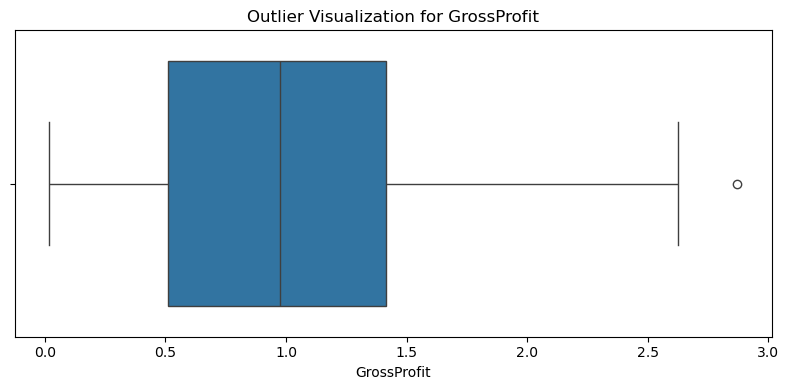

GrossProfit: 1 outliers found.


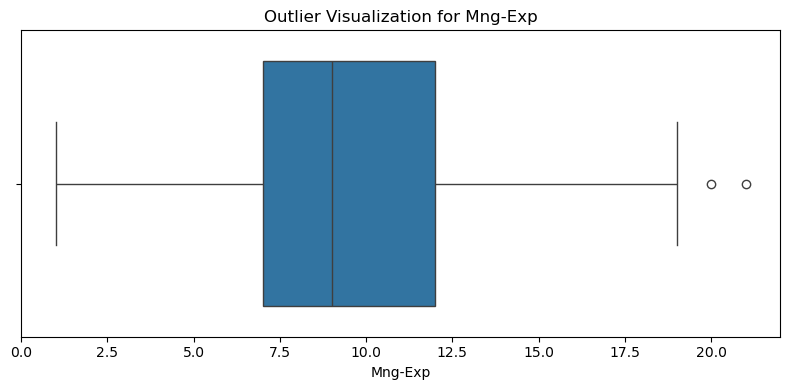

Mng-Exp: 2 outliers found.


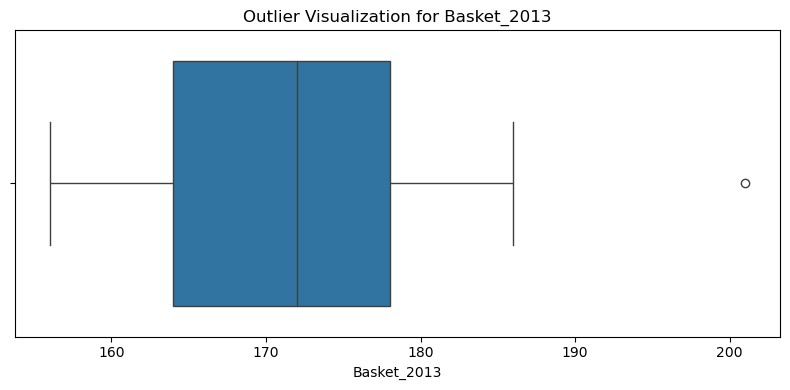

Basket_2013: 1 outliers found.


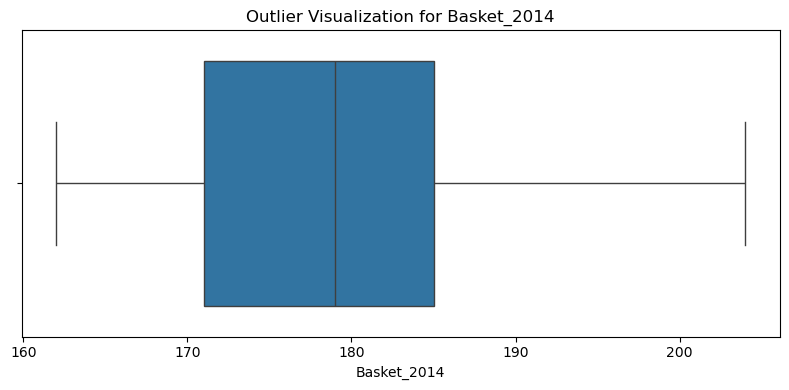

Basket_2014: 0 outliers found.


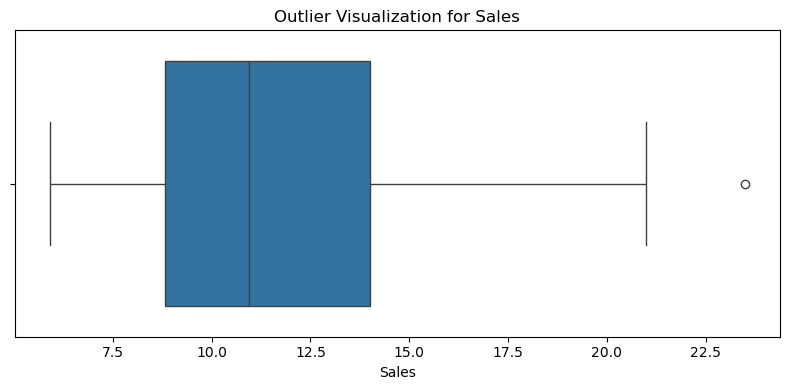

Sales: 1 outliers found.


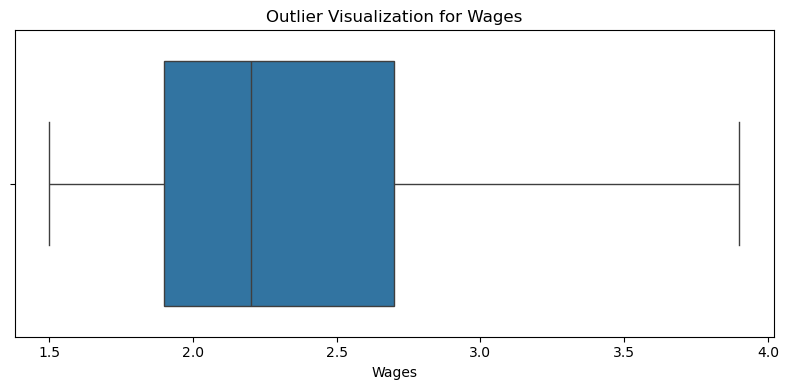

Wages: 0 outliers found.


In [18]:
# Loop through features and create boxplots + outlier counts
for column in features_to_check:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Outlier Visualization for {column}')
    plt.tight_layout()
    plt.show()

    num_outliers = get_iqr_outliers(df[column]).shape[0]
    print(f"{column}: {num_outliers} outliers found.")


In [19]:
# Function to remove outliers using the IQR method
def remove_iqr_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return df[(df[column] >= lower) & (df[column] <= upper)]


# Remove outliers column by column
for col in features_to_check:
    before = df.shape[0]
    df = remove_iqr_outliers(df, col)
    after = df.shape[0]
    print(f"{col}: Removed {before - after} rows due to outliers.")



GrossProfit: Removed 1 rows due to outliers.
Mng-Exp: Removed 2 rows due to outliers.
Basket_2013: Removed 1 rows due to outliers.
Basket_2014: Removed 0 rows due to outliers.
Sales: Removed 1 rows due to outliers.
Wages: Removed 0 rows due to outliers.


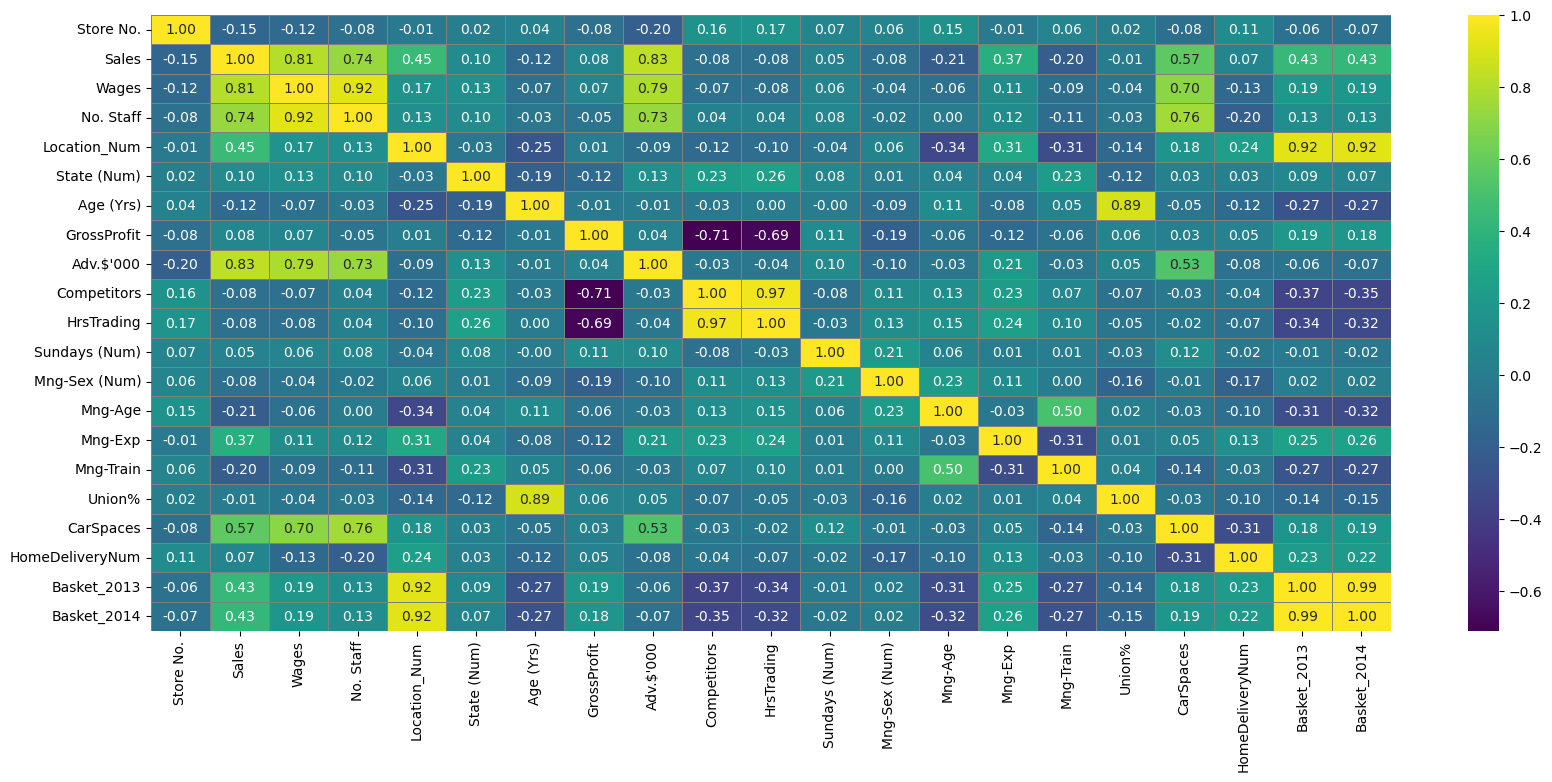

In [20]:
new_df = df.drop(columns=['Location', 'State', 'Sundays', 'Mng-Sex', 'HomeDelivery'])
corr = new_df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, fmt='.2f',cmap='viridis', linewidths=0.5, linecolor='gray')
plt.show()

In [21]:
best_columns = [
    'Sales',
    'Wages',
    'Competitors',
    'CarSpaces',
    'Basket_2014',
    'Mng-Exp',
    "Location_Num",
    'Basket_2013'

]

In [22]:
Special_df = df[best_columns]

In [23]:
Special_df.head()

,Sales,Wages,Competitors,CarSpaces,Basket_2014,Mng-Exp,Location_Num,Basket_2013
0,12.5,2.3,3,46,178,12,2,171
1,14.5,2.7,5,73,178,16,2,168
2,19.0,3.1,2,64,188,9,3,180
3,18.2,2.6,1,66,180,9,2,173
4,7.6,2.0,0,29,171,4,1,166


In [24]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(Special_df )

In [25]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
import numpy as np
import random

# Convert scaled data to list (pyclustering requires list of lists)
data = x_scaled.tolist()

# Choose random initial medoid indices (make sure they are within data length)
n_clusters = 3
initial_medoids = random.sample(range(len(data)), n_clusters)

# Create and run the K-Medoids algorithm
kmedoids_instance = kmedoids(data, initial_medoids, data_type='points')
kmedoids_instance.process()

# Get cluster assignments and medoid indices
clusters = kmedoids_instance.get_clusters()
medoid_indices = kmedoids_instance.get_medoids()

# Build labels array from cluster assignments
labels = np.zeros(len(data), dtype=int)
for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
        labels[index] = cluster_id

# Get the medoid points (i.e., "cluster centers")
medoid_points = [data[idx] for idx in medoid_indices]

# Print results
print(f"Clusters (medoid points): {medoid_points}")
print(f"\nLabels: {labels}")


Clusters (medoid points): [[-0.6013179391937321, 0.23363501002703974, 0.2710346673986741, -0.054597914907790854, -1.1467255520476463, -1.0850619396492953, -1.182437613350982, -0.9889643638661743], [1.6049346211071558, 1.1251370219723227, -0.30690690278967503, 0.6278760214395932, 1.117954660060788, 0.24153149415464895, 1.4351723704031, 1.1025555305454287], [-0.24831752954559025, -0.3012661971401297, 0.2710346673986741, 0.2638899220543217, 0.16440509706776305, 0.24153149415464895, 0.1263673785260591, 0.18751557674035238]]

Labels: [2 2 1 1 0 1 1 2 1 0 2 0 0 1 0 0 1 2 1 2 1 2 2 2 0 0 2 2 1 0 0 2 1 2 0 2 2
 0 2 0 2 0 2 1 2 0 0 2 1 0 0 0 2 0 2 1 1 0 1 0 2 0 1 1 2 0 2 0 2 2 1 2 2 1
 0 2 2 2 2 2 2 0 2 0 2 0 0 2 2 2 1 1 2 0 2 2 1 0 2 0 0 0 2 0 2 2 2 2 2 1 2
 2 0 2 0 0 1 2 1 2 1 2 2 2 0 0 2 0 2 2 0 2 2 2 0 0 1 1 1 0 0 2 0 2 2]


In [26]:
Special_df ['Clusters_Labels'] = labels
Special_df.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_9536\2178653772.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Special_df ['Clusters_Labels'] = labels


,Sales,Wages,Competitors,CarSpaces,Basket_2014,Mng-Exp,Location_Num,Basket_2013,Clusters_Labels
0,12.5,2.3,3,46,178,12,2,171,2
1,14.5,2.7,5,73,178,16,2,168,2
2,19.0,3.1,2,64,188,9,3,180,1
3,18.2,2.6,1,66,180,9,2,173,1
4,7.6,2.0,0,29,171,4,1,166,0


In [31]:
from sklearn.model_selection import train_test_split  # To split the dataset
from sklearn.linear_model import LinearRegression      # Linear Regression model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

Mean Squared Error (MSE): 3.53
R^2 Score: 0.63


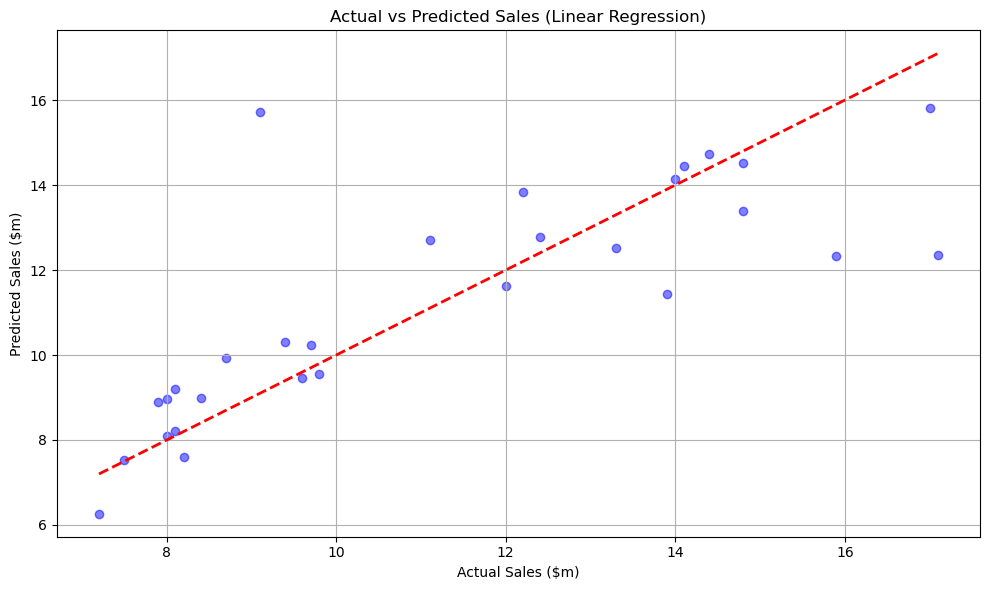


Feature Importance (Linear Regression Coefficients):
        Feature  Coefficient
0         Wages     4.695221
5  Location_Num     1.204876
4       Mng-Exp     0.224865
6   Basket_2013     0.030321
2     CarSpaces    -0.007730
3   Basket_2014    -0.050023
1   Competitors    -0.195544


In [28]:
X = Special_df.drop(['Sales', 'Clusters_Labels'], axis=1)  
y = Special_df['Sales']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Visualize Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales ($m)')
plt.ylabel('Predicted Sales ($m)')
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Display feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})
print("\nFeature Importance (Linear Regression Coefficients):")
print(feature_importance.sort_values(by='Coefficient', ascending=False))


Linear Regression Evaluation Metrics:
                        Metric    Value
      Mean Squared Error (MSE) 3.531657
Root Mean Squared Error (RMSE) 1.879270
     Mean Absolute Error (MAE) 1.185194
                      R² Score 0.628287


c:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


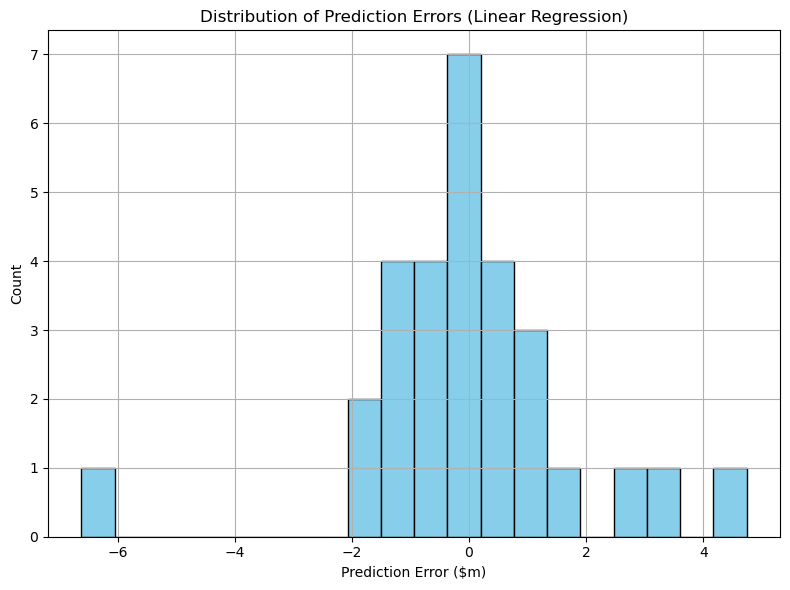

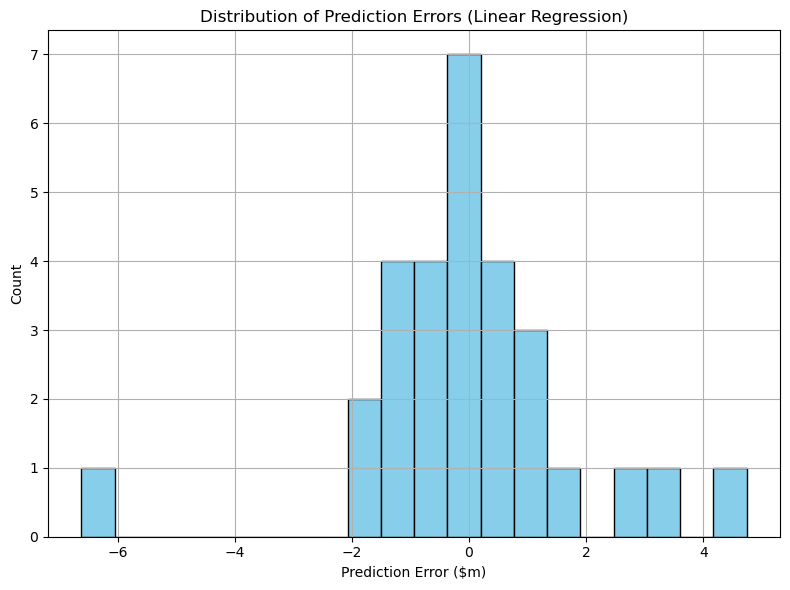

In [32]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Create a summary table for Linear Regression metrics
metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Root Mean Squared Error (RMSE)',
               'Mean Absolute Error (MAE)', 'R² Score'],
    'Value': [mse, rmse, mae, r2]
})
print('\nLinear Regression Evaluation Metrics:')
print(metrics_df.to_string(index=False))

# Visualize the distribution of prediction errors
errors = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Prediction Errors (Linear Regression)')
plt.xlabel('Prediction Error ($m)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8, 6))
plt.hist(errors, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Prediction Errors (Linear Regression)')
plt.xlabel('Prediction Error ($m)')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

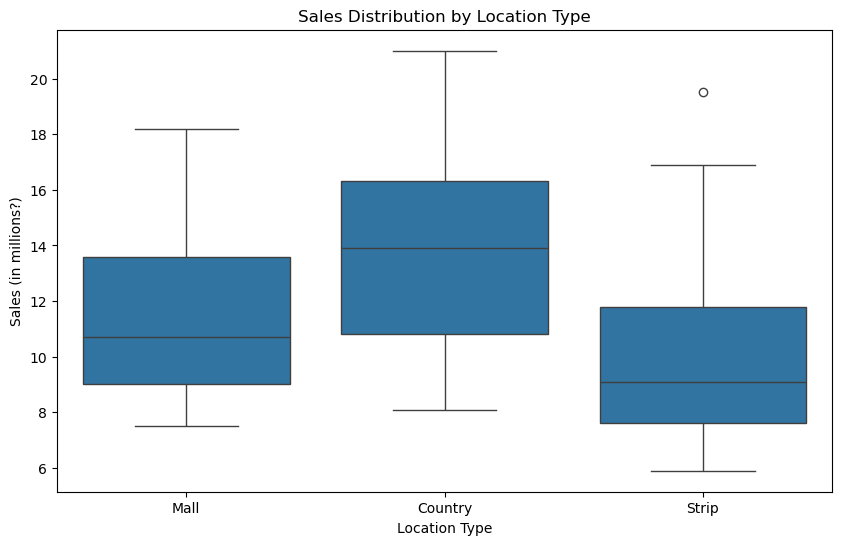

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Location', y='Sales', data=df)
plt.title('Sales Distribution by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Sales (in millions?)')
plt.show()

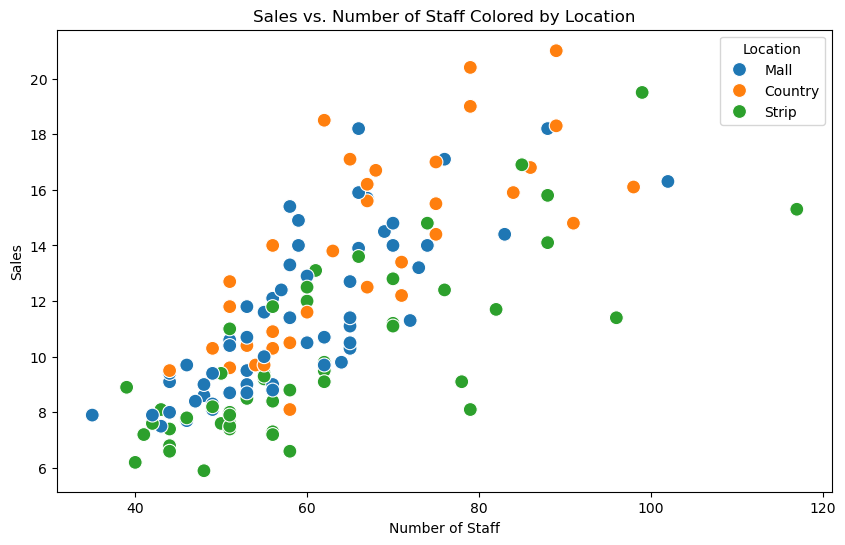

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='No. Staff', y='Sales', hue='Location', data=df, s=100)
plt.title('Sales vs. Number of Staff Colored by Location')
plt.xlabel('Number of Staff')
plt.ylabel('Sales')
plt.show()

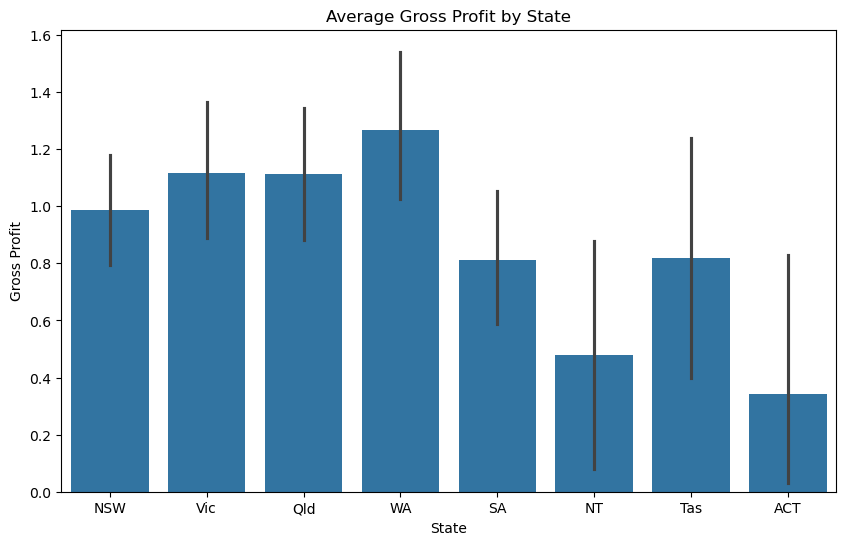

In [36]:
plt.figure(figsize=(10,6))
sns.barplot(x='State', y='GrossProfit', data=df)
plt.title('Average Gross Profit by State')
plt.xlabel('State')
plt.ylabel('Gross Profit')
plt.show()

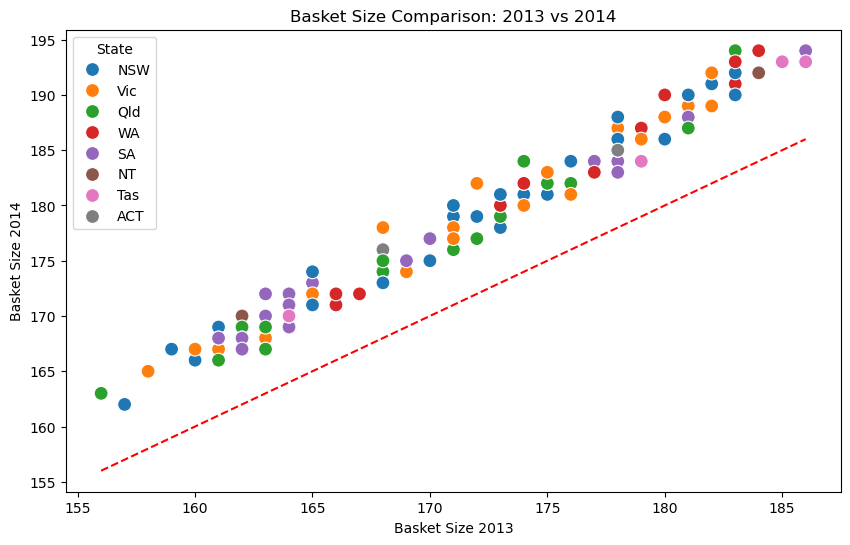

In [38]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Basket_2013', y='Basket_2014', hue='State', data=df, s=100)
plt.plot([df['Basket_2013'].min(), df['Basket_2013'].max()], 
         [df['Basket_2013'].min(), df['Basket_2013'].max()], 
         'r--')  # Reference line
plt.title('Basket Size Comparison: 2013 vs 2014')
plt.xlabel('Basket Size 2013')
plt.ylabel('Basket Size 2014')
plt.show()

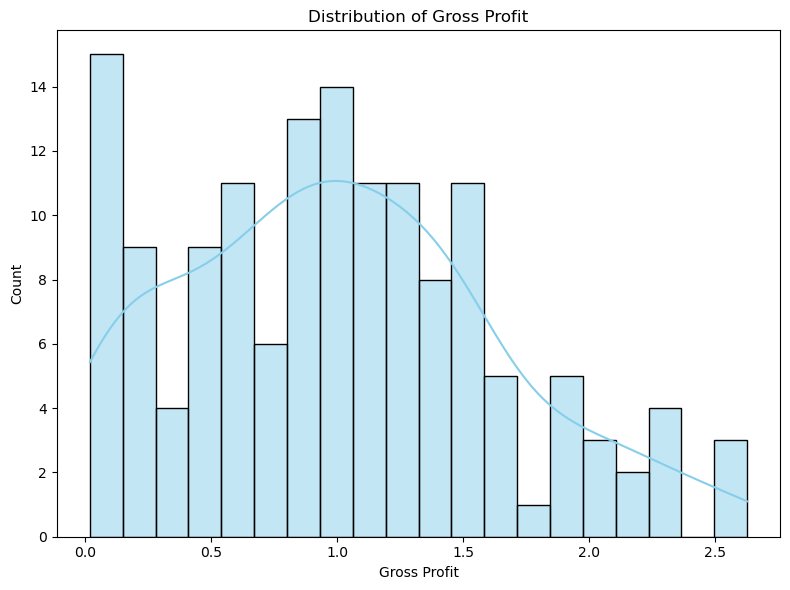

In [54]:
plt.figure(figsize=(8, 6))
sns.histplot(df['GrossProfit'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Gross Profit')
plt.xlabel('Gross Profit')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


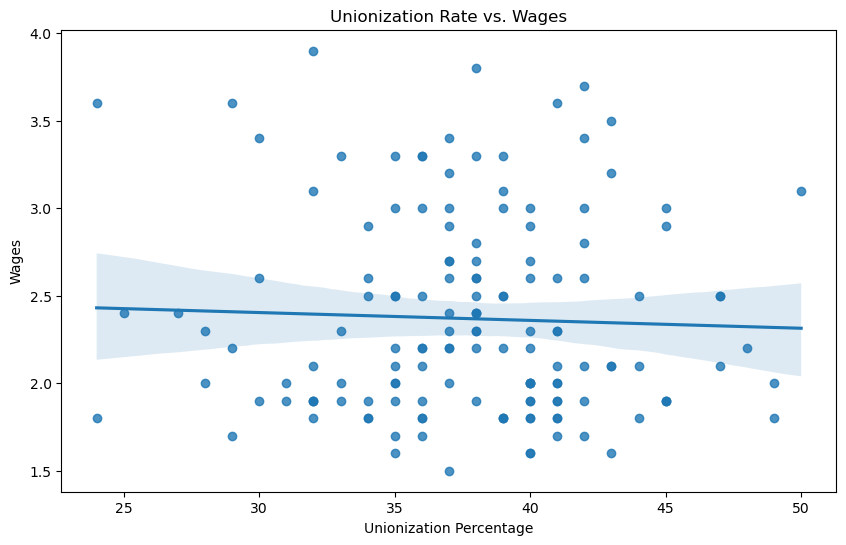

In [39]:
plt.figure(figsize=(10,6))
sns.regplot(x='Union%', y='Wages', data=df)
plt.title('Unionization Rate vs. Wages')
plt.xlabel('Unionization Percentage')
plt.ylabel('Wages')
plt.show()

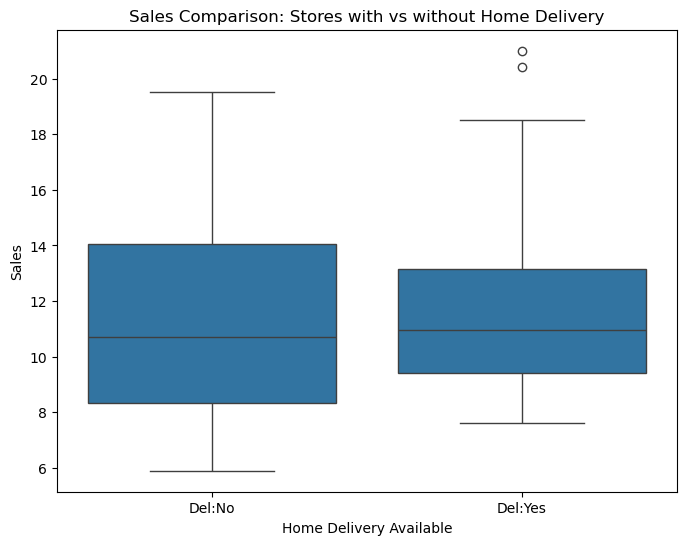

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(x='HomeDelivery', y='Sales', data=df)
plt.title('Sales Comparison: Stores with vs without Home Delivery')
plt.xlabel('Home Delivery Available')
plt.ylabel('Sales')
plt.show()

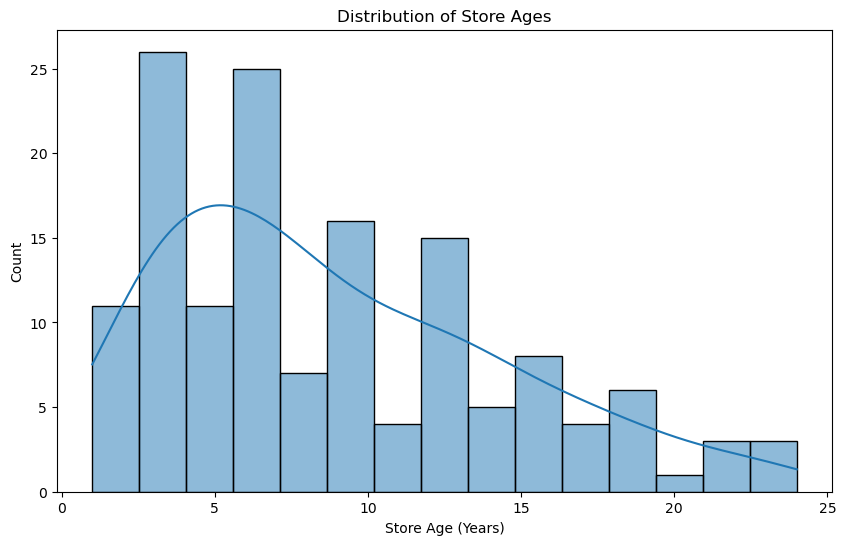

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age (Yrs)'], bins=15, kde=True)
plt.title('Distribution of Store Ages')
plt.xlabel('Store Age (Years)')
plt.ylabel('Count')
plt.show()

In [48]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [50]:
# Melt the basket data for animation
basket_df = df.melt(id_vars=['State', 'Location'], 
                   value_vars=['Basket_2013', 'Basket_2014'],
                   var_name='Year', 
                   value_name='Basket_Size')

fig6 = px.scatter(basket_df,
                 x='Year',
                 y='Basket_Size',
                 animation_frame='Year',
                 color='Location',
                 size='Basket_Size',
                 hover_name='State',
                 facet_col='Location',
                 title='<b>Basket Size Changes 2013-2014 by Location</b>',
                 height=600)

fig6.update_layout(xaxis_title="Year",
                  yaxis_title="Basket Size",
                  transition={'duration': 1000})
fig6.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_9536\1991527270.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\pc\AppData\Local\Temp\ipykernel_9536\1991527270.py:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




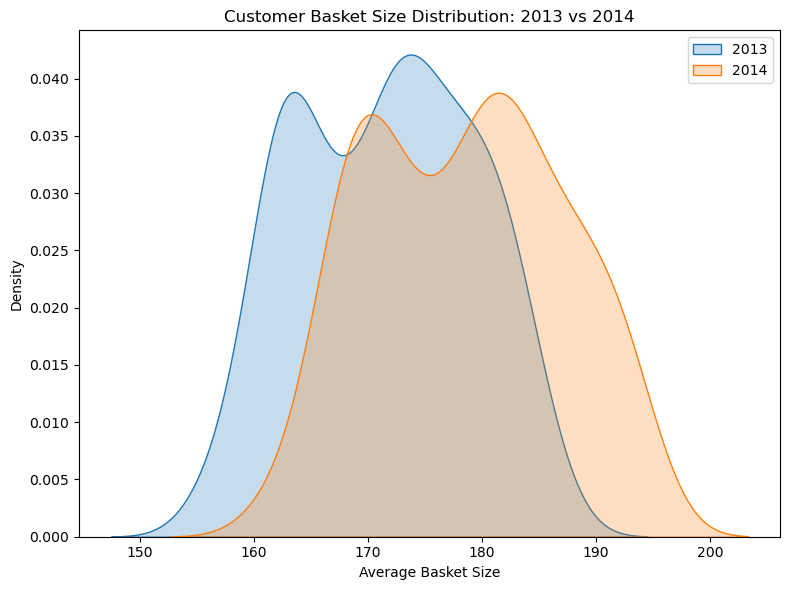

In [52]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Basket_2013'], label='2013', shade=True)
sns.kdeplot(df['Basket_2014'], label='2014', shade=True)
plt.title('Customer Basket Size Distribution: 2013 vs 2014')
plt.xlabel('Average Basket Size')
plt.legend()
plt.tight_layout()
plt.show()


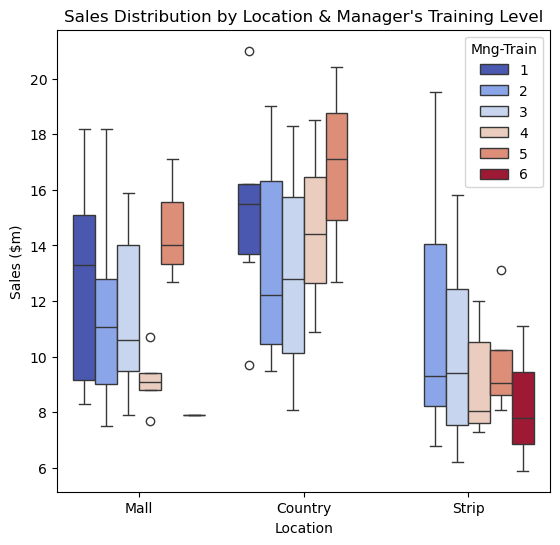

In [53]:
plt.figure(figsize=(14, 6))

# manager's training
plt.subplot(1, 2, 1)
sns.boxplot(x='Location', y='Sales', hue='Mng-Train', data=df, palette='coolwarm')
plt.title("Sales Distribution by Location & Manager's Training Level")
plt.xlabel('Location')
plt.ylabel('Sales ($m)')
plt.legend(title='Mng-Train')